#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [1]:
import cv2## import cv2
import numpy as np## import numpy
import matplotlib.pyplot as plt## import matplotlib pyplot
from sklearn.cluster import KMeans ## import KMeans cluster from sklearn
from scipy.spatial import distance ## import distance from scipy.spatial
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("Plaksha_Faculty.jpg")
## Convert the image to grayscale
gray_img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Detected" ## The text you want to write
font = cv2.FONT_HERSHEY_COMPLEX  ## Font type
font_scale = 0.7  ## Font scale factor
font_color = (0,0,234) ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img,text,(x, y-5),font,font_scale,font_color,font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow("Therefore, the number of faces detected are" + str(len(faces_rect)),img)
cv2.waitKey(0)
cv2.destroyAllWindows()

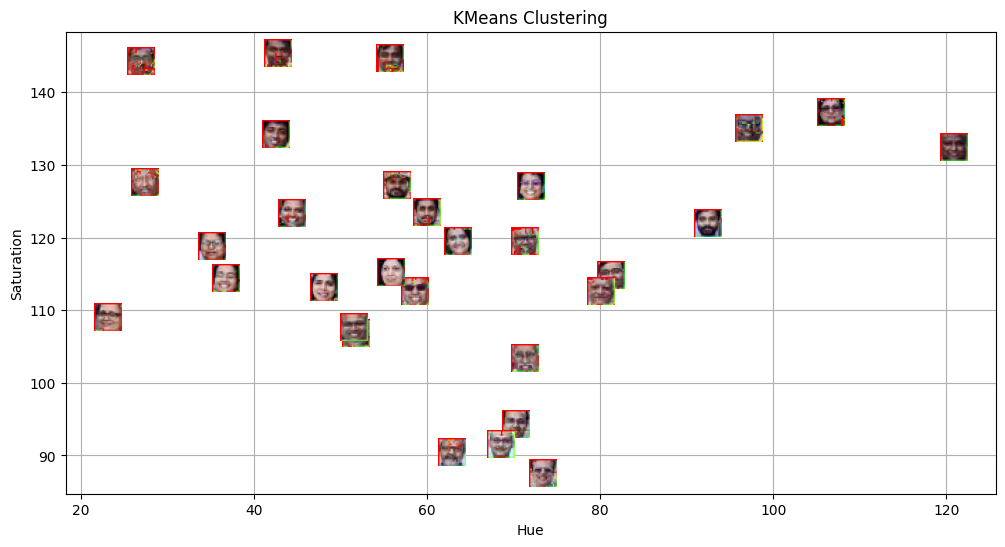

In [3]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans =KMeans(n_clusters=2, random_state=42)
kmeans.fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

ax.set_xlabel("Hue")## Put x label
ax.set_ylabel("Saturation")## Put y label
ax.set_title("KMeans Clustering")## Put title
ax.grid(True)## Put grid
plt.show()## show the plot

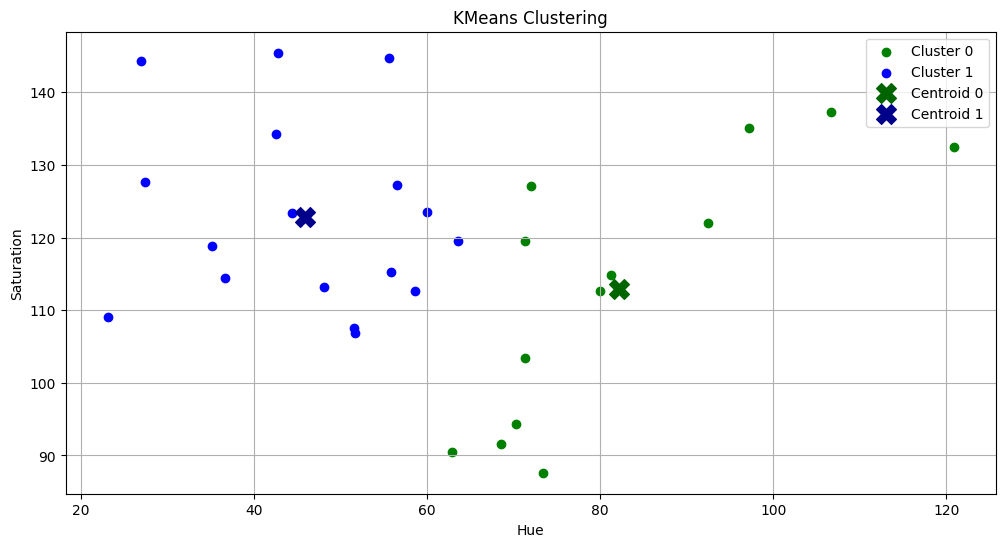

In [4]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0],cluster_0_points[:, 1],color='green',label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0],cluster_1_points[:, 1],color='blue',label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1],color='darkgreen',marker='X',s=200,label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1],color='darkblue',marker='X',s=200,label='Centroid 1')

ax.set_xlabel("Hue")## Put x label
ax.set_ylabel("Saturation")## Put y label
ax.set_title("KMeans Clustering")## Put title
ax.legend()
ax.grid(True)## Put grid
plt.show()## show the plot


In [5]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img =cv2.imread("Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray =cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces =face_cascade.detectMultiScale(template_gray,1.054)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Detected Face in Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

Template belongs to Cluster: 0


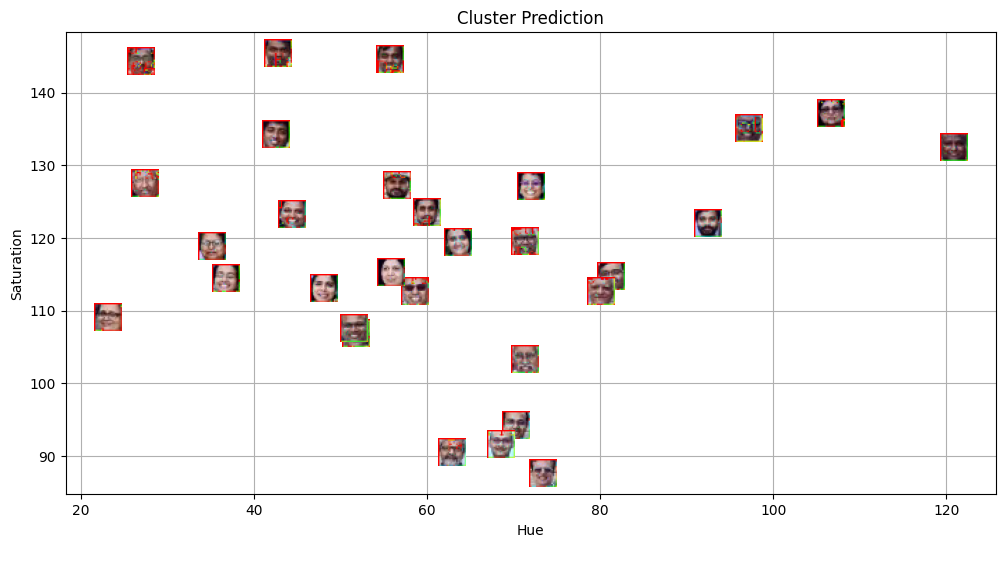

In [6]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv =cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
for (x, y, w, h) in template_faces:
    face = template_hsv[y:y+h, x:x+w]
template_hue =np.mean(face[:, :, 0])
template_saturation =np.mean(face[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_features = np.array([[template_hue, template_saturation]])
template_label = kmeans.predict(template_features)[0]
print("Template belongs to Cluster:", template_label)

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

ax.set_xlabel("Hue")## Put x label
ax.set_ylabel("Saturation")## Put y label
ax.set_title("Cluster Prediction")## Put title
ax.grid(True)## Put grid
plt.show()## show the plot

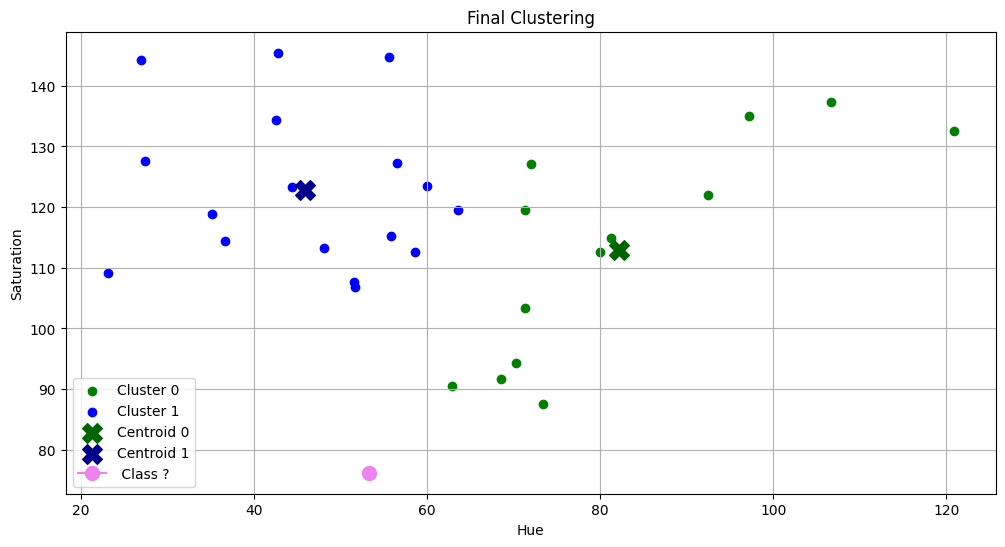

In [7]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0],cluster_0_points[:, 1],color='green',label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0],cluster_1_points[:, 1],color='blue',label='Cluster 1')
# Calculate and plot centroids for both the clusters
centroid_0 =np.mean(cluster_0_points, axis=0)
centroid_1 =np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0],centroid_0[1],color='darkgreen',marker='X',s=200,label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0],centroid_1[1],color='darkblue',marker='X',s=200,label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

ax.set_xlabel("Hue")## Put x label
ax.set_ylabel("Saturation")## Put y label
ax.set_title("Final Clustering")## Put title
ax.legend()
ax.grid(True)## Put grid
plt.show()## show the plot
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms?
ANS) Common distance metrics are:

1.Euclidean Distance

2.Manhattan Distance

3.Chebyshev Distance

4.Cosine Distance

5.Hamming Distance

6.Minkowski Distance

These metrics help classify new samples based on nearby points.

#### 2. What are some real-world applications of distance-based classification algorithms? 
ANS) Real world applications include:

1.Face recognition systems

2.Recommendation systems

3.Anomaly detection 

4.Image classification 

5.Medical diagnosis

6.Spam detection

#### 3. Explain various distance metrics. 
ANS) Distance metrics include:
1.Euclidean Distance- Straight-line distance between two points.

2.Manhattan Distance- Distance measured along grid lines.

3.Chebyshev Distance- Maximum absolute difference between features. 

4.Cosine Distance- Measures angle between two vectors and focuses on direction rather than magnitude.

5.Hamming Distance- Counts number of differing positions and is generally used for categorical or binary data.

6.Minkowski Distance- Generalized version of Euclidean and Manhattan.

#### 4. What is the role of cross validation in model performance? 
ANS) Cross-validation basically allows us to evaluate how well our generalizes to unseen data. It works by dividing the dataset into various folds, then training on some of them, and finally testing on the rest of the folds. Repeat this multiple times.
Its role includes:

1.Reducing overfitting

2.Gives reliable accuracy estimate

3.Helps in selecting best hyperparameters

4.Ensures model stability

the model may be misleading,without crossvalidation.

#### 5. Explain variance and bias in terms of KNN? 
ANS) In KNN, the value of K controls the balance between bias and variance. A small K like K=1 makes the model very flexible with low bias but high variance, which can lead to overfitting. A large K like K=20 makes the model more stable with low variance but high bias, which can cause underfitting. Choosing the right K helps achieve the bias-variance tradeoff.
